In [3]:
# import numpy as np 
# from scipy.fftpack import dct
# import seaborn 

# sample1 = dct(np.random.rand(100))
# sample2 = dct(np.random.rand(30))
# seaborn.kdeplot(sample1, color="r")
# seaborn.kdeplot(sample2, color="b")

In [15]:
import torch
import numpy as np


In [5]:
dct = torch.tensor([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
             [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
             [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
             [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
             [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
             [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
             [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
             [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098],], dtype=torch.float32)

In [16]:
np.pi

3.141592653589793

In [38]:
# 1d dct

dct_coeff = []
multi = 0.5
for i in range(8) :
    for j in range(8) :
        if i == 0 :
            multi = 1/(2*np.sqrt(2))
        else :
            multi = 0.5
        
        coeff = np.cos(np.pi * i * (2*j+1) / 16)*multi
        dct_coeff.append(coeff)
            
            
        

In [40]:
1/ np.sqrt(8)

0.35355339059327373

In [43]:
dct = np.array(dct_coeff).reshape(8,8)
dct.T@dct

array([[ 1.00000000e+00, -1.01506949e-16, -4.32746666e-17,
        -2.42392728e-17, -1.39246081e-16,  7.88118312e-17,
         2.00856868e-16, -1.70562493e-16],
       [-1.01506949e-16,  1.00000000e+00,  3.24499827e-17,
         1.63574980e-17,  1.53260723e-16, -2.88419699e-16,
        -1.24636773e-16,  2.51800326e-17],
       [-4.32746666e-17,  3.24499827e-17,  1.00000000e+00,
        -1.34196901e-16, -7.84923877e-17, -1.02241963e-16,
        -1.98673065e-16, -2.25284360e-17],
       [-2.42392728e-17,  1.63574980e-17, -1.34196901e-16,
         1.00000000e+00,  7.95628319e-18,  3.02863617e-16,
         1.74731638e-16,  1.61004188e-17],
       [-1.39246081e-16,  1.53260723e-16, -7.84923877e-17,
         7.95628319e-18,  1.00000000e+00, -6.24187528e-17,
        -3.90385273e-17, -3.66093213e-16],
       [ 7.88118312e-17, -2.88419699e-16, -1.02241963e-16,
         3.02863617e-16, -6.24187528e-17,  1.00000000e+00,
         1.21575873e-16,  8.41357861e-17],
       [ 2.00856868e-16, -1.246367

In [42]:
# dct.T@dct

In [45]:
#2d dct
dct_coeff_2d = []
for i in range(8) :
    if i == 0  :
        coeff_i = 1/np.sqrt(2)
    else :
        coeff_i = 1
    for j in range(8) :
        for k in range(8) :
            if k == 0  :
                coeff_k = 1/np.sqrt(2)
            else :
                coeff_k = 1
            for l in range(8) :
                coeff = 0.25 * coeff_k * coeff_i * np.cos(np.pi * i * (2*j+1) / 16) * np.cos(np.pi * k * (2*l+1) / 16)
                dct_coeff_2d.append(coeff)

                    
                

In [46]:
dct_coeff_2d = np.array(dct_coeff_2d).reshape(8,8,64)

In [47]:
dct_coeff_2d.shape

(8, 8, 64)

In [48]:
# ! wget https://img.hankyung.com/photo/202105/99.26479073.1.jpg

--2022-10-26 11:17:21--  https://img.hankyung.com/photo/202105/99.26479073.1.jpg
Resolving img.hankyung.com (img.hankyung.com)... 183.111.246.138
Connecting to img.hankyung.com (img.hankyung.com)|183.111.246.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53170 (52K) [image/jpeg]
Saving to: ‘99.26479073.1.jpg’

99.26479073.1.jpg   100%[===================>]  51.92K  --.-KB/s    in 0.007s  

2022-10-26 11:17:21 (7.20 MB/s) - ‘99.26479073.1.jpg’ saved [53170/53170]



(448, 448, 3)

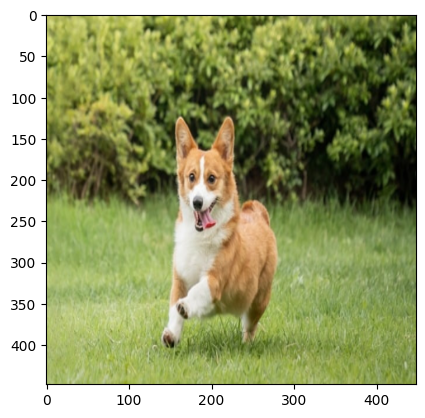

In [88]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('dog.jpg')
img = cv2.resize(img, (448, 448))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
img.shape

In [83]:
dct_coeff_2d.shape

torch.Size([8, 8, 64])

In [94]:
conv = torch.nn.Conv2d(1, 64, (8,8), (8,8), groups=1, bias=False)
conv.weight.shape

torch.Size([64, 1, 8, 8])

In [111]:
conv.weight = torch.nn.Parameter(torch.tensor(dct_coeff_2d[None, :,:,:].permute(3,0,1,2), dtype=torch.float))
conv.weight.shape

/tmp/ipykernel_223054/3882242257.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  conv.weight = torch.nn.Parameter(torch.tensor(dct_coeff_2d[None, :,:,:].permute(3,0,1,2), dtype=torch.float))


torch.Size([64, 1, 8, 8])

In [109]:
img1 = torch.tensor(img[None,:,:,:]).permute(0,3,1,2)
img1.shape

torch.Size([1, 3, 448, 448])

In [104]:
img1[0:1,0,:,:].shape

torch.Size([1, 448, 448])

In [112]:
out = conv(img1[0:1,0:1,:,:]/255.)


In [113]:
out.shape

torch.Size([1, 64, 56, 56])

In [114]:
out1 = out[0,:,:,:].reshape(8,8,56,56).permute(2,3,0,1,).reshape(8*56,8*56)

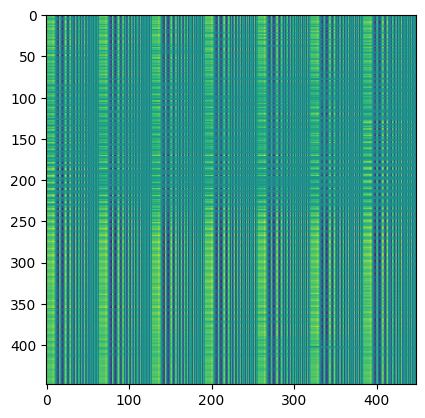

In [117]:
plt.imshow(out1.detach().numpy())

In [120]:
import cv2
img = cv2.imread('dog.jpg')
img = cv2.resize(img, (448, 448))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(448, 448, 3)

In [58]:
conv = torch.nn.Conv2d(1, 64, (8,8), (8,8), groups=1, bias=False)

In [107]:
a = torch.randn(1,3,10,10)
a[0:1,0:1,:,:].shape

torch.Size([1, 1, 10, 10])

In [59]:
# dct_coeff_2d = torch.tensor(dct_coeff_2d)
# dct_coeff_2d.shape

torch.Size([8, 8, 64])

In [72]:
# # img_ = img.permute(2,0,1).reshape(3,56, 8, 56, 8).permute(0,1,3,2,4)
# img_ = np.transpose(img, (2,0,1)).reshape(3,56, 8, 56, 8)
# img_ = np.transpose(img_, (0,1,3,2,4))
# img_ = img_.reshape(-1, 64)
# img_.shape

(9408, 64)

In [ ]:
dct_img = img_ @ np.array(dct_coeff_2d).reshape(-1, 64)
# dct_img.shape

In [73]:
# np.array(dct_coeff_2d).reshape(-1, 64).shape

(64, 64)

In [74]:
# dct_img = img_ @ np.array(dct_coeff_2d).reshape(-1, 64)
# dct_img.shape

(9408, 64)

In [75]:
# dct_img = dct_img.reshape(3,56,56, 8,8)
# dct_img.shape

(3, 56, 56, 8, 8)

In [76]:
# dct_img = np.transpose(dct_img, (0, 1, 3, 2,4))

In [77]:
dct_img.shape

(3, 56, 8, 56, 8)

In [78]:
# dct_img = dct_img.reshape(3, 448, 448)
# dct_img = np.transpose(dct_img, (1,2,0))
# dct_img.shape
                       

(448, 448, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


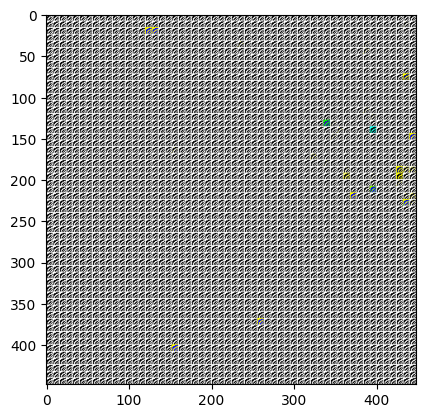

In [81]:
# plt.imshow(dct_img)